# Visible Watermark Information Classification

This notebook is used together with the VWIC dataset to test the performance
of the YOLO v8 pre-trained model from Ultralytics.  The model will be fine-tuned
on the VWIC dataset.

## YOLO (v8) by Ultralytics

Reference: https://docs.ultralytics.com/modes/train



### Load and Fine-Tune the Model

In [2]:
from ultralytics import YOLO

YAML_CONFIG = "data.yaml"
TRAIN_DIR = "runs/train"

model = YOLO(model="yolov8s.pt") # select appropriate size model to fine-tune based on your dataset/task.

model.train(
    data=YAML_CONFIG,
    epochs=150,
    batch=8,
    imgsz=640,
    lr0=0.01, # initial learning rate
    patience=10,  # patience for early stopping callback
)

New https://pypi.org/project/ultralytics/8.3.94 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.62 🚀 Python-3.12.8 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=150, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

100%|██████████| 5.35M/5.35M [00:00<00:00, 10.8MB/s]


AMP: checks passed ✅


train: Scanning /home/gb/vwic/ultralytics/datasets/visible-watermark-information-classification-voc2007.v9i.yolov8/train/labels... 350 images, 19 backgrounds, 0 corrupt: 100%|██████████| 350/350 [00:00<00:00, 924.91it/s]

train: New cache created: /home/gb/vwic/ultralytics/datasets/visible-watermark-information-classification-voc2007.v9i.yolov8/train/labels.cache



val: Scanning /home/gb/vwic/ultralytics/datasets/visible-watermark-information-classification-voc2007.v9i.yolov8/valid/labels... 100 images, 5 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 514.58it/s]


val: New cache created: /home/gb/vwic/ultralytics/datasets/visible-watermark-information-classification-voc2007.v9i.yolov8/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.07G      1.735      2.915      1.531         34        640: 100%|██████████| 44/44 [00:06<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.65it/s]

                   all        100        380      0.509      0.619      0.567      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.18G      1.323      1.657      1.262         35        640: 100%|██████████| 44/44 [00:07<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]

                   all        100        380      0.518      0.642      0.571      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150       2.1G      1.357      1.604      1.306         19        640: 100%|██████████| 44/44 [00:05<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.90it/s]

                   all        100        380      0.497      0.652      0.599      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150       2.1G       1.34      1.425      1.279         46        640: 100%|██████████| 44/44 [00:08<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.10it/s]

                   all        100        380      0.641       0.64      0.687      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.12G      1.302      1.381      1.245         43        640: 100%|██████████| 44/44 [00:06<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.13it/s]

                   all        100        380       0.66      0.579       0.69      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.18G      1.311      1.226       1.25         25        640: 100%|██████████| 44/44 [00:05<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.34it/s]

                   all        100        380      0.737       0.71      0.796      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.15G      1.304      1.185      1.238         38        640: 100%|██████████| 44/44 [00:05<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.69it/s]

                   all        100        380      0.742      0.718      0.766      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.18G      1.273      1.183      1.231         34        640: 100%|██████████| 44/44 [00:05<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.39it/s]

                   all        100        380      0.712      0.764      0.787       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.12G       1.29      1.194      1.236         39        640: 100%|██████████| 44/44 [00:04<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.19it/s]


                   all        100        380      0.747      0.746      0.815      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.08G      1.228      1.096      1.212         26        640: 100%|██████████| 44/44 [00:04<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.48it/s]

                   all        100        380      0.841      0.815      0.899      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.15G      1.235      1.063      1.208         45        640: 100%|██████████| 44/44 [00:05<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.14it/s]


                   all        100        380      0.778      0.821      0.884      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.18G       1.23      1.054      1.187         40        640: 100%|██████████| 44/44 [00:05<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.69it/s]

                   all        100        380      0.822      0.784      0.863      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.15G      1.203     0.9904      1.195         37        640: 100%|██████████| 44/44 [00:06<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.87it/s]

                   all        100        380      0.879      0.813      0.905      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.09G      1.188     0.9724       1.17         39        640: 100%|██████████| 44/44 [00:05<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.05it/s]

                   all        100        380      0.872      0.806      0.908      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.12G      1.169     0.9446      1.172         27        640: 100%|██████████| 44/44 [00:04<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.57it/s]

                   all        100        380      0.891      0.823      0.914      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.17G      1.194     0.9402      1.204         28        640: 100%|██████████| 44/44 [00:05<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.54it/s]

                   all        100        380      0.893      0.816      0.907      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.15G      1.179     0.9388       1.18         29        640: 100%|██████████| 44/44 [00:05<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.19it/s]


                   all        100        380      0.897      0.835       0.91      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.17G      1.174     0.9183       1.18         28        640: 100%|██████████| 44/44 [00:07<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.06it/s]

                   all        100        380      0.877       0.85      0.916       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.15G      1.165     0.9029      1.167         40        640: 100%|██████████| 44/44 [00:05<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.13it/s]

                   all        100        380      0.878       0.84      0.928      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.08G      1.143      0.883      1.154         35        640: 100%|██████████| 44/44 [00:05<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.65it/s]

                   all        100        380      0.918      0.848      0.935      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.12G       1.14     0.8761      1.137         42        640: 100%|██████████| 44/44 [00:05<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.60it/s]

                   all        100        380      0.896       0.85      0.929      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.17G      1.156     0.8781       1.18         27        640: 100%|██████████| 44/44 [00:07<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.72it/s]

                   all        100        380      0.918      0.859      0.935      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.08G      1.142     0.8679       1.16         26        640: 100%|██████████| 44/44 [00:05<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.23it/s]

                   all        100        380      0.882      0.872      0.931      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.07G      1.109     0.8182      1.143         42        640: 100%|██████████| 44/44 [00:05<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.55it/s]


                   all        100        380      0.907      0.883      0.937      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.15G      1.092     0.8105      1.139         42        640: 100%|██████████| 44/44 [00:05<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.72it/s]

                   all        100        380      0.915      0.877      0.945      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.18G      1.126     0.8532      1.152         31        640: 100%|██████████| 44/44 [00:05<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.28it/s]

                   all        100        380       0.88      0.883      0.904      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.13G      1.079     0.8079      1.123         38        640: 100%|██████████| 44/44 [00:07<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.31it/s]

                   all        100        380      0.899      0.908      0.943      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.08G      1.101     0.7954      1.148         31        640: 100%|██████████| 44/44 [00:05<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.29it/s]

                   all        100        380       0.93      0.884      0.944      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.15G       1.07     0.7811      1.138         42        640: 100%|██████████| 44/44 [00:05<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.44it/s]

                   all        100        380       0.91      0.895      0.932      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.09G      1.091     0.8038      1.132         51        640: 100%|██████████| 44/44 [00:05<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.51it/s]

                   all        100        380      0.921      0.898      0.945      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.15G      1.051     0.7663      1.117         40        640: 100%|██████████| 44/44 [00:07<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.32it/s]

                   all        100        380       0.91      0.889      0.945      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.09G      1.072     0.7859      1.115         35        640: 100%|██████████| 44/44 [00:06<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.07it/s]

                   all        100        380      0.885      0.882      0.935      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.15G      1.102     0.7882      1.146         35        640: 100%|██████████| 44/44 [00:04<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.06it/s]

                   all        100        380       0.91      0.897      0.932      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.17G      1.054     0.7546      1.114         25        640: 100%|██████████| 44/44 [00:05<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.15it/s]


                   all        100        380      0.923      0.869      0.944      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.15G      1.045     0.7204      1.115         43        640: 100%|██████████| 44/44 [00:05<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.05it/s]

                   all        100        380      0.919      0.909      0.958      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.18G       1.05      0.735      1.118         39        640: 100%|██████████| 44/44 [00:06<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.03it/s]

                   all        100        380      0.933      0.906      0.956      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.16G      1.067     0.7356      1.123         41        640: 100%|██████████| 44/44 [00:04<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.23it/s]

                   all        100        380      0.899      0.892      0.938      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.17G      1.063      0.721        1.1         39        640: 100%|██████████| 44/44 [00:04<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.36it/s]

                   all        100        380       0.93      0.899      0.944      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.12G      1.034     0.7049      1.109         34        640: 100%|██████████| 44/44 [00:04<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.27it/s]

                   all        100        380      0.933      0.857      0.945       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.08G      1.021     0.7099      1.103         34        640: 100%|██████████| 44/44 [00:04<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.22it/s]

                   all        100        380      0.893      0.897      0.952       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.12G      1.039     0.7179      1.111         31        640: 100%|██████████| 44/44 [00:06<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]

                   all        100        380      0.943      0.908      0.963      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.17G      1.041     0.7167      1.108         36        640: 100%|██████████| 44/44 [00:05<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.08it/s]

                   all        100        380      0.929      0.905      0.958      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.07G      1.026     0.6915      1.107         25        640: 100%|██████████| 44/44 [00:04<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.10it/s]

                   all        100        380      0.956      0.903       0.96      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.17G      1.031     0.6847      1.101         47        640: 100%|██████████| 44/44 [00:04<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.86it/s]


                   all        100        380      0.927      0.903      0.947      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.12G      1.015     0.6939      1.103         31        640: 100%|██████████| 44/44 [00:05<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.75it/s]

                   all        100        380      0.924      0.891      0.951      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.17G      1.021     0.7031      1.095         45        640: 100%|██████████| 44/44 [00:06<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.23it/s]

                   all        100        380      0.928       0.91      0.951      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.13G      1.011     0.6789      1.093         45        640: 100%|██████████| 44/44 [00:05<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.13it/s]

                   all        100        380      0.914      0.911      0.954      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.18G     0.9855     0.6684      1.099         29        640: 100%|██████████| 44/44 [00:04<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.18it/s]

                   all        100        380      0.928      0.904      0.955      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.15G      1.015     0.6597      1.097         43        640: 100%|██████████| 44/44 [00:04<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.63it/s]

                   all        100        380      0.932      0.933      0.969      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.07G     0.9728     0.6536      1.084         38        640: 100%|██████████| 44/44 [00:04<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.07it/s]

                   all        100        380      0.948        0.9      0.949      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.07G     0.9946     0.6562      1.089         31        640: 100%|██████████| 44/44 [00:06<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.04it/s]


                   all        100        380      0.929      0.891      0.947      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.07G     0.9845     0.6436      1.083         36        640: 100%|██████████| 44/44 [00:05<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.34it/s]

                   all        100        380      0.936      0.898      0.947      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.15G     0.9656     0.6466      1.068         55        640: 100%|██████████| 44/44 [00:04<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.66it/s]

                   all        100        380      0.949      0.888      0.959      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.15G     0.9799      0.635      1.074         37        640: 100%|██████████| 44/44 [00:04<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.30it/s]

                   all        100        380      0.928      0.917      0.959      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.13G     0.9778      0.638      1.083         39        640: 100%|██████████| 44/44 [00:05<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.46it/s]

                   all        100        380      0.933      0.898      0.946      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150       2.1G      0.934     0.6317      1.057         31        640: 100%|██████████| 44/44 [00:07<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.72it/s]

                   all        100        380      0.911      0.936      0.959      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.12G     0.9495     0.6182      1.064         23        640: 100%|██████████| 44/44 [00:06<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]

                   all        100        380      0.948      0.905      0.963      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.18G     0.9657     0.6248      1.068         36        640: 100%|██████████| 44/44 [00:06<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.71it/s]

                   all        100        380       0.94      0.902      0.968      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.07G     0.9551     0.6449      1.062         46        640: 100%|██████████| 44/44 [00:05<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.44it/s]

                   all        100        380      0.916      0.907      0.961      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.17G     0.9341     0.6136      1.056         30        640: 100%|██████████| 44/44 [00:07<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.47it/s]

                   all        100        380      0.923      0.932      0.966      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.15G     0.9359     0.6153      1.061         26        640: 100%|██████████| 44/44 [00:05<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.93it/s]

                   all        100        380      0.944      0.871      0.947      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.07G     0.9268     0.5964       1.06         26        640: 100%|██████████| 44/44 [00:05<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.47it/s]

                   all        100        380      0.964      0.901      0.956      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.15G     0.9398     0.5863      1.059         30        640: 100%|██████████| 44/44 [00:06<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.96it/s]

                   all        100        380      0.954      0.915      0.957      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.07G     0.9306     0.5939       1.06         38        640: 100%|██████████| 44/44 [00:06<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.22it/s]

                   all        100        380       0.94      0.933      0.962      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.12G     0.9062     0.5774      1.041         28        640: 100%|██████████| 44/44 [00:05<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.19it/s]

                   all        100        380       0.94      0.922      0.952      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.17G     0.9206     0.6041      1.054         55        640: 100%|██████████| 44/44 [00:05<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.52it/s]

                   all        100        380      0.958      0.924       0.96       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.13G     0.8834     0.5849      1.033         29        640: 100%|██████████| 44/44 [00:05<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.38it/s]

                   all        100        380      0.944      0.929      0.959      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.18G     0.9039     0.5881      1.043         44        640: 100%|██████████| 44/44 [00:06<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.51it/s]

                   all        100        380      0.948      0.934      0.959      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.07G     0.8963     0.5791      1.051         35        640: 100%|██████████| 44/44 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.30it/s]

                   all        100        380      0.962      0.939       0.97      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.18G     0.8923     0.5977      1.057         27        640: 100%|██████████| 44/44 [00:05<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.24it/s]

                   all        100        380      0.947      0.923      0.964      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.13G     0.8838     0.5632       1.05         36        640: 100%|██████████| 44/44 [00:05<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.74it/s]

                   all        100        380      0.959       0.94      0.965      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.17G     0.8966     0.5715      1.044         35        640: 100%|██████████| 44/44 [00:05<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.34it/s]

                   all        100        380      0.947      0.935      0.964       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.15G     0.8734     0.5515      1.028         38        640: 100%|██████████| 44/44 [00:05<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        100        380       0.95      0.918      0.959       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.18G     0.8525     0.5489      1.025         22        640: 100%|██████████| 44/44 [00:05<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.53it/s]

                   all        100        380      0.957      0.917      0.964      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.07G     0.8856     0.5512      1.042         31        640: 100%|██████████| 44/44 [00:05<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.31it/s]

                   all        100        380      0.958      0.911      0.958      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.07G     0.8985     0.5671      1.043         36        640: 100%|██████████| 44/44 [00:05<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.54it/s]

                   all        100        380      0.947      0.947      0.969      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.12G     0.8712     0.5561      1.034         27        640: 100%|██████████| 44/44 [00:05<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.32it/s]

                   all        100        380      0.943       0.95      0.967      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.08G     0.8457     0.5368      1.021         24        640: 100%|██████████| 44/44 [00:06<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.55it/s]

                   all        100        380      0.945       0.94      0.964      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.13G     0.8571      0.545      1.035         27        640: 100%|██████████| 44/44 [00:05<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.73it/s]

                   all        100        380       0.97      0.921      0.966      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.08G     0.8381     0.5301      1.025         32        640: 100%|██████████| 44/44 [00:06<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.90it/s]

                   all        100        380      0.971      0.914      0.972      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.15G     0.8223     0.5306      1.009         43        640: 100%|██████████| 44/44 [00:06<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.35it/s]

                   all        100        380      0.954      0.943      0.963      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.09G     0.8411     0.5359      1.014         30        640: 100%|██████████| 44/44 [00:07<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.21it/s]

                   all        100        380      0.966      0.916       0.97      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.15G     0.8488     0.5282       1.03         29        640: 100%|██████████| 44/44 [00:05<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.91it/s]

                   all        100        380      0.966      0.923      0.965      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.17G     0.8283     0.5245      1.017         42        640: 100%|██████████| 44/44 [00:05<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.09it/s]

                   all        100        380      0.945      0.917      0.957      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.07G     0.8223     0.5216      1.012         50        640: 100%|██████████| 44/44 [00:05<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.50it/s]

                   all        100        380      0.945      0.919      0.966      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.07G     0.7994     0.5027      1.001         35        640: 100%|██████████| 44/44 [00:07<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.11it/s]

                   all        100        380      0.966      0.914      0.965      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.13G     0.8173     0.5192      1.011         49        640: 100%|██████████| 44/44 [00:05<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.44it/s]


                   all        100        380      0.957      0.915      0.958      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.11G     0.7972     0.5115      1.005         27        640: 100%|██████████| 44/44 [00:05<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.62it/s]

                   all        100        380      0.939      0.911      0.957      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.12G     0.7905      0.504      1.001         39        640: 100%|██████████| 44/44 [00:05<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.18it/s]

                   all        100        380      0.952      0.922      0.955      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.18G     0.7751     0.4955     0.9877         22        640: 100%|██████████| 44/44 [00:05<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.32it/s]

                   all        100        380      0.957       0.94      0.966      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.16G     0.8042     0.4959      1.009         30        640: 100%|██████████| 44/44 [00:07<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.64it/s]

                   all        100        380      0.974      0.928       0.97      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.07G     0.8116     0.5131      1.007         27        640: 100%|██████████| 44/44 [00:05<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.83it/s]

                   all        100        380      0.947      0.934       0.97      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.12G     0.7891     0.4904      1.012         44        640: 100%|██████████| 44/44 [00:05<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.77it/s]

                   all        100        380      0.965      0.921      0.971      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.17G     0.7905     0.4968       1.01         24        640: 100%|██████████| 44/44 [00:05<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.53it/s]

                   all        100        380      0.961      0.912      0.963      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.12G     0.7549     0.4894     0.9965         37        640: 100%|██████████| 44/44 [00:05<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.04it/s]


                   all        100        380      0.977      0.921      0.969      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.17G      0.769     0.4982     0.9886         30        640: 100%|██████████| 44/44 [00:05<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.13it/s]

                   all        100        380      0.958      0.921      0.965      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.13G     0.7714     0.4848     0.9965         36        640: 100%|██████████| 44/44 [00:05<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.31it/s]

                   all        100        380      0.958      0.923      0.968      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.18G     0.7539     0.4774     0.9935         38        640: 100%|██████████| 44/44 [00:05<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.51it/s]

                   all        100        380      0.947      0.938       0.97       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.08G      0.772     0.4834          1         46        640: 100%|██████████| 44/44 [00:05<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.80it/s]

                   all        100        380      0.953      0.916      0.967       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.17G     0.7587      0.489     0.9891         32        640: 100%|██████████| 44/44 [00:05<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]

                   all        100        380      0.953      0.932      0.959      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.12G     0.7348     0.4802     0.9895         31        640: 100%|██████████| 44/44 [00:05<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.24it/s]

                   all        100        380      0.968      0.928      0.968      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.08G     0.7555     0.4786     0.9796         36        640: 100%|██████████| 44/44 [00:05<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


                   all        100        380      0.966      0.915      0.959      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.07G     0.7367     0.4828     0.9727         48        640: 100%|██████████| 44/44 [00:05<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.95it/s]

                   all        100        380      0.959      0.919      0.956      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.09G     0.7518     0.4783      0.981         51        640: 100%|██████████| 44/44 [00:05<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.15it/s]

                   all        100        380      0.954      0.944      0.967      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.07G     0.7359     0.4732     0.9824         27        640: 100%|██████████| 44/44 [00:05<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


                   all        100        380       0.97      0.919      0.965      0.661
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 95, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

105 epochs completed in 0.214 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.62 🚀 Python-3.12.8 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.06it/s]


                   all        100        380      0.976      0.921      0.969      0.689
               contact         95         95      0.974      0.895      0.945      0.633
            identifier         95         95      0.988      0.916      0.973      0.679
                  logo         95         95       0.99      0.916      0.977      0.812
                notice         95         95      0.953      0.958      0.981      0.631
Speed: 0.7ms preprocess, 3.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fc1185e55b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [5]:
print(f"Model: {model.model_name}")
print(f"Model Info: {model.info(detailed=True)}")
model.save(filename="models/best.pt")

Model: yolov8s.pt
layer                                    name  gradient  parameters               shape        mu     sigma
    0                     model.0.conv.weight     False         864       [32, 3, 3, 3]  -0.00225     0.131  torch.float32
    1                       model.0.bn.weight     False          32                [32]      3.47     0.985  torch.float32
    2                         model.0.bn.bias     False          32                [32]    -0.628      3.01  torch.float32
    3                     model.1.conv.weight     False       18432      [64, 32, 3, 3]  -0.00117    0.0408  torch.float32
    4                       model.1.bn.weight     False          64                [64]      3.37     0.704  torch.float32
    5                         model.1.bn.bias     False          64                [64]     0.424      1.21  torch.float32
    6                 model.2.cv1.conv.weight     False        4096      [64, 64, 1, 1]  -0.00794    0.0578  torch.float32
    7        

#### Results

![Results](runs/detect/train/results.png)

![Confustion Matrix](runs/detect/train/confusion_matrix_normalized.png)


image 1/1 /home/gb/vwic/ultralytics/datasets/visible-watermark-information-classification-voc2007.v9i.yolov8/test/images/007449_jpg.rf.7ac740c0e08594e3be2b0ea5a3b925c2.jpg: 640x640 1 contact, 1 identifier, 1 logo, 1 notice, 252.7ms
Speed: 4.3ms preprocess, 252.7ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 640)


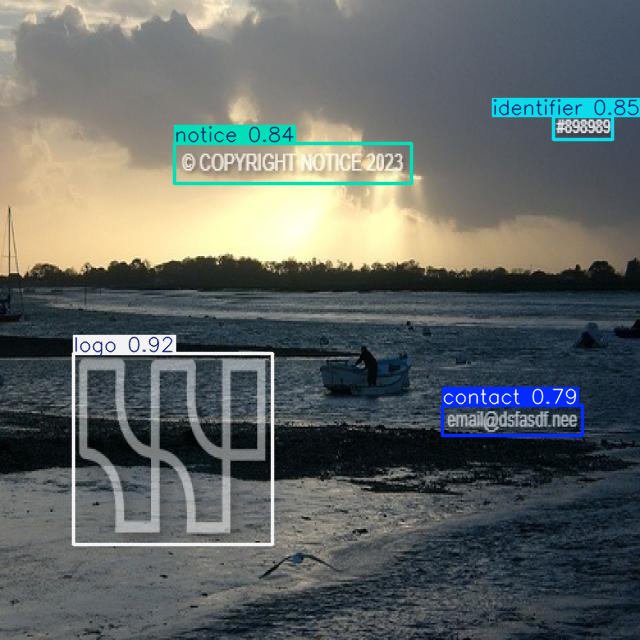

In [6]:
TEST_IMAGE = "./datasets/visible-watermark-information-classification-voc2007.v9i.yolov8/test/images/007449_jpg.rf.7ac740c0e08594e3be2b0ea5a3b925c2.jpg"

model = YOLO("models/best.pt")  # Path to your saved model

results = model.predict(
    source=TEST_IMAGE,
    conf=0.7,  # confidence threshold
    save=False,  # no need to save results, just display below.
    imgsz=640,
    device='cpu',
)

# Process results list
for result in results:
    result.show()  # display to screen

## Training

